In [1]:
import json
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df = pd.read_json('/content/drive/MyDrive/dblp.v10/dblp-ref/dblp-ref-0.json', chunksize= 70000, lines = True)
df1 = pd.DataFrame([])
for i in df:
  df1 = pd.concat([df1,i],ignore_index=True)

In [12]:
df = pd.read_json('/content/drive/MyDrive/dblp.v10/dblp-ref/dblp-ref-1.json', chunksize= 70000, lines = True)
for i in df:
  df1 = pd.concat([df1,i],ignore_index=True)

In [13]:
df = pd.read_json('/content/drive/MyDrive/dblp.v10/dblp-ref/dblp-ref-2.json', chunksize= 70000, lines = True)
for i in df:
  df1 = pd.concat([df1,i],ignore_index=True)

In [14]:
df = pd.read_json('/content/drive/MyDrive/dblp.v10/dblp-ref/dblp-ref-3.json', chunksize= 70000, lines = True)
for i in df:
  df1 = pd.concat([df1,i],ignore_index=True)

In [162]:
df2 = df1.query('year == 2012')

In [163]:
df2.shape

(207237, 8)

In [164]:
df2['authors'].to_csv('/content/drive/MyDrive/dblp.v10/dblp-ref/graph_tuples.csv') 

In [167]:
sample_df=df2.sample(5, random_state = 8242000)
sample_df['authors'].to_csv('/content/drive/MyDrive/dblp.v10/dblp-ref/known_Authors1.csv') 

In [168]:
sample_df

,abstract,authors,n_citation,references,title,venue,year,id
1707681,To solve the high computational demand of intr...,"[Yi-Ching Ting, Tian-Sheuan Chang]",50,[3c0a3558-a843-46e9-97c2-0cb467e70e61],Fast intra prediction algorithm with transform...,asia pacific conference on circuits and systems,2012,f07b9c56-f13f-4e5f-a31e-b3b7c7a44509
1810259,Size of the distribution and transmission netw...,"[Izudin Dzafic, H.T. Neisius, Priyanka Mohapatra]",4,"[735d071e-4dba-413b-9604-1e948e54772e, a5b89ad...",High performance power flow algorithm for symm...,Journal of Computer Applications in Technology,2012,0c065b42-809a-4f05-9ba8-d14c2d220e88
1125573,Recent advances in modeling animal perception ...,"[Nathan F. Lepora, Uriel Martinez-Hernandez, H...",21,"[2e904d90-00e9-410d-9021-7549ade79991, 3925ee2...",Embodied hyperacuity from Bayesian perception:...,intelligent robots and systems,2012,67efc355-2ee1-4a5a-b273-45853a37ee3a
967302,"In this paper, the thrust allocation problem f...","[Parikshit Yadav, Rajesh Kumar, Sanjib Kumar P...",7,"[0414bfc5-e3c7-4a66-81ff-492ce8566305, 0c2e23f...",Energy-Efficient Thrust Allocation for Semi-Su...,IEEE Transactions on Industrial Informatics,2012,42f80183-f580-49e4-a1c5-e54e716d3bd1
1196466,This paper presents a method of automatic lexi...,"[Kun Li, Helen M. Meng]",3,"[9563b913-7025-4100-8f85-d830054c12e8, b7f6f0d...",Perceptually-motivated assessment of automatic...,international symposium on chinese spoken lang...,2012,788b496c-f15d-4b66-a753-6a908c05dbf3


In [169]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

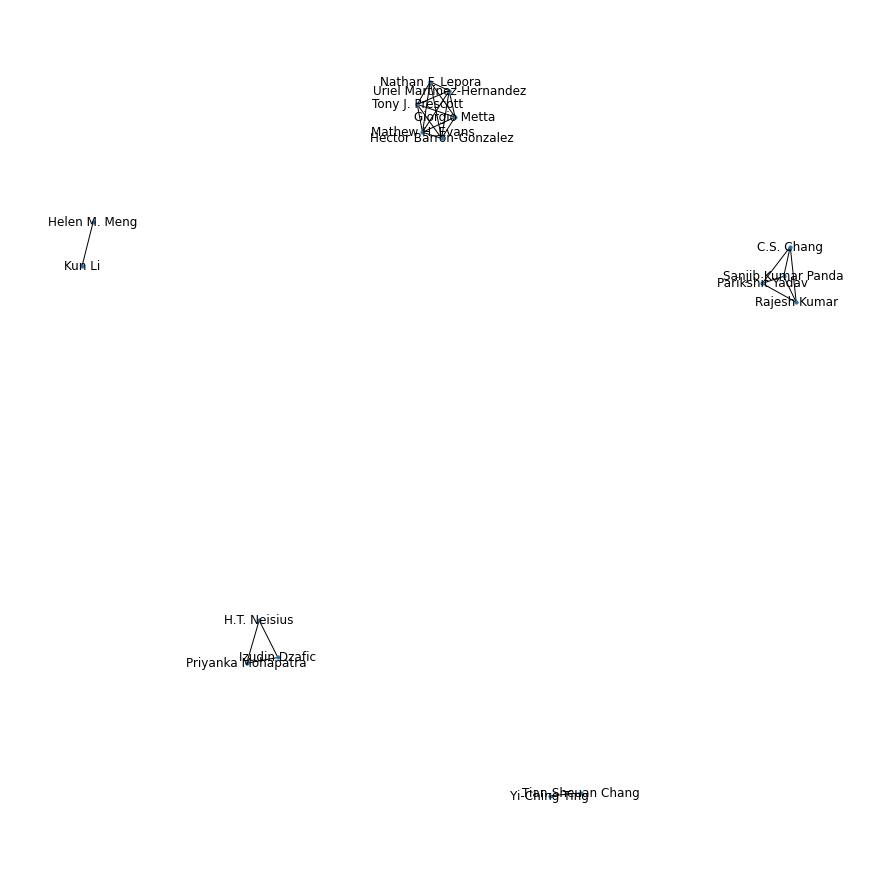

In [206]:
# Graph 1

def add_nodes_known_authors(a_list):
  global G
  G1 = nx.complete_graph(a_list)
  G = nx.compose(G,G1)

sample_df['authors'].apply(add_nodes_known_authors)
plt.figure(figsize=(12,12))
# nx.draw_networkx_nodes(G,node_size=100,node_shape='o',node_color='0.75', pos=nx.graphviz_layout(G))
# nx.draw_networkx_edges(G, width=2,edge_color='b', pos = nx.graphviz_layout(G))

nx.draw(G,with_labels=True, font_size=12, node_size = 10)


In [250]:
# display(list(nx.find_cliques(G)))
n = G.number_of_nodes()
m = G.number_of_edges()
density_g1 = nx.density(G)
num_connected_comp = len(list(nx.connected_components(G)))
degree_values = list(dict(G.degree()).values())
min_degree = min(degree_values)
max_degree = max(degree_values)
avg_degree = sum(degree_values)/n
# diameter = infinity 

3.0588235294117645

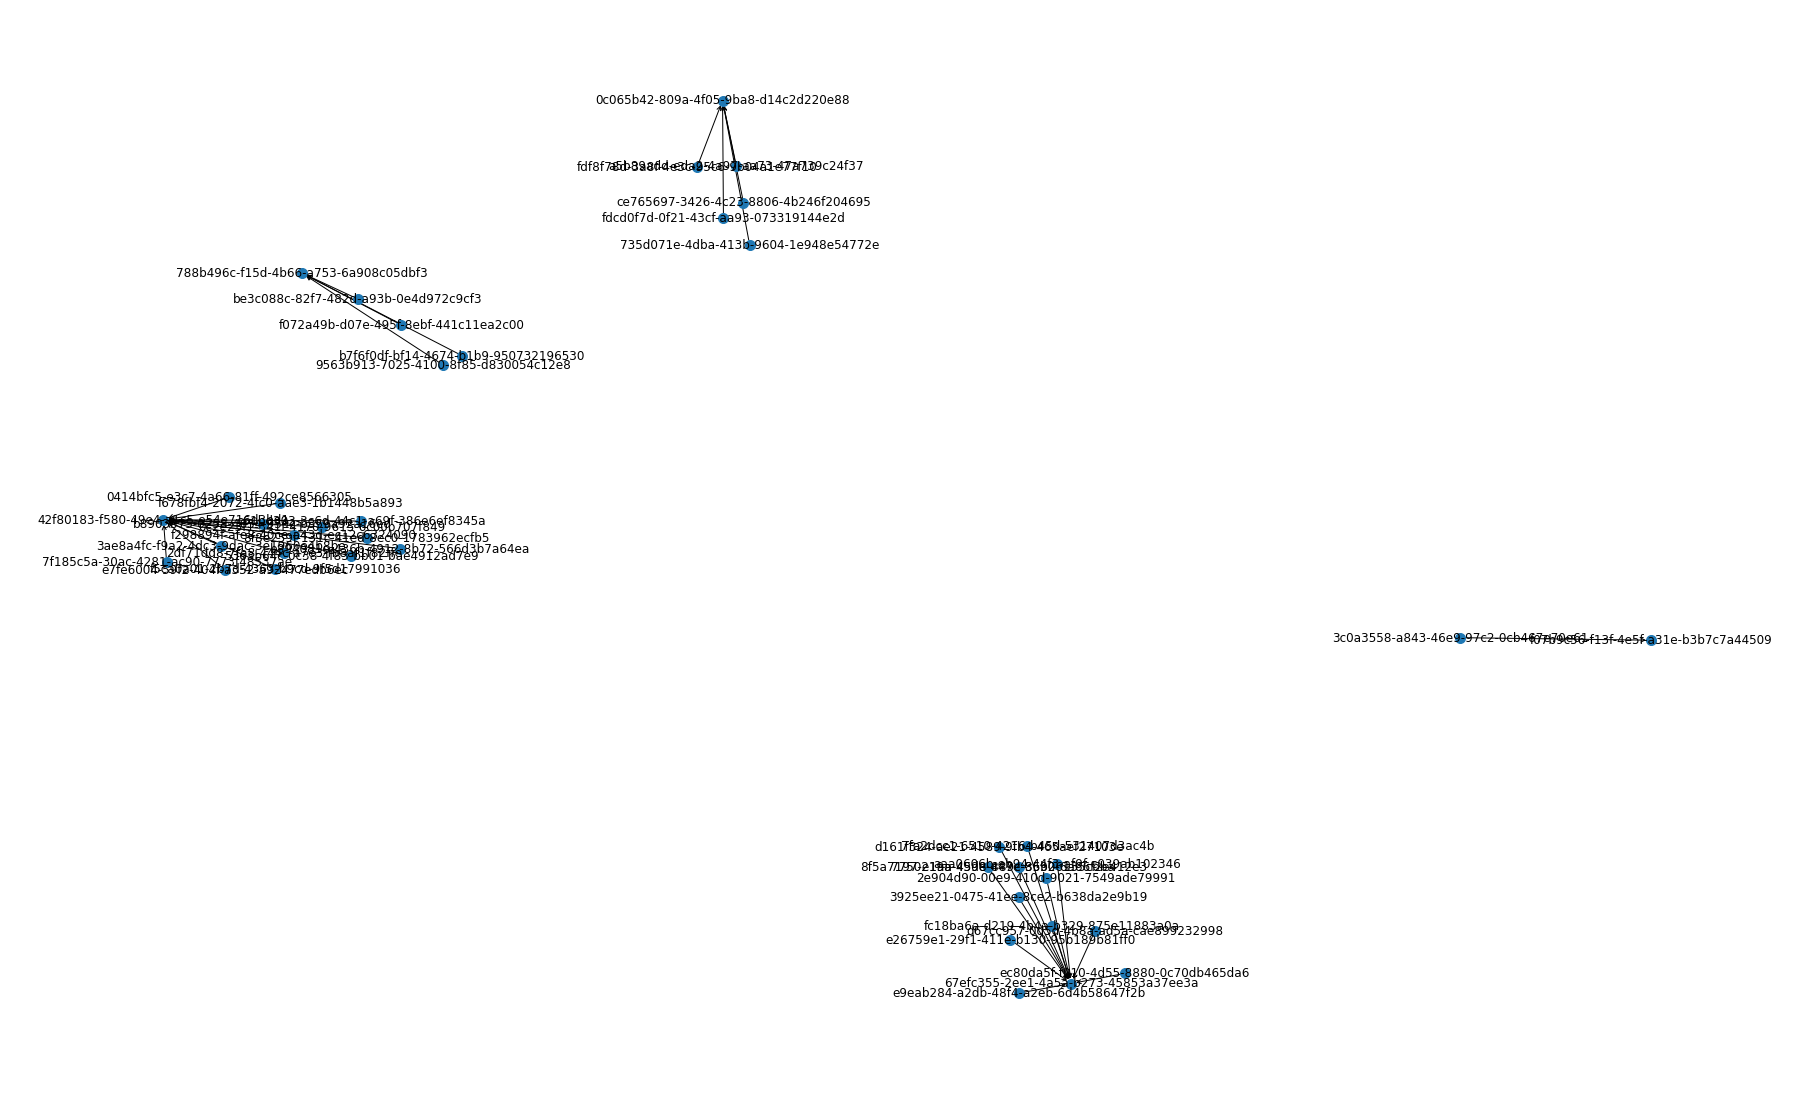

In [255]:
# Graph 2
# sample_id_list = sample_df['id']
# sample_id_list

id_reference = {}
paper_citation = nx.DiGraph()
sample_id_list = sample_df.iloc[:,[3,7]].set_index('id')
sample_id_list = sample_id_list.to_dict()['references']


for i,j in sample_id_list.items():
  for k in j:
    paper_citation.add_edge(k,i) 

plt.figure(figsize=(25,15))
nx.draw(paper_citation,with_labels=True, font_size=12, node_size = 100,arrowstyle="->",arrowsize=10)
plt.show()

In [252]:
n = paper_citation.number_of_nodes()
m = paper_citation.number_of_edges()
density_g1 = nx.density(paper_citation)
# num_connected_comp = len(list(nx.connected_components(paper_citation)))
degree_values = list(dict(paper_citation.degree()).values())
min_degree = min(degree_values)
max_degree = max(degree_values)
avg_degree = sum(degree_values)/n
# diameter = infinity 

In [193]:
# Graph 3
author_venue = {}
av = nx.Graph()
sample_df1 = sample_df.iloc[:,[1,5]].set_index('venue')

In [194]:
sample_df1=sample_df1.to_dict()['authors']
final = {}
l = []
for i,j in sample_df1.items():
  for k in j:
    av.add_edge(k,i) 
# for i, j in final.items():
#   av.add_edge(i,j)

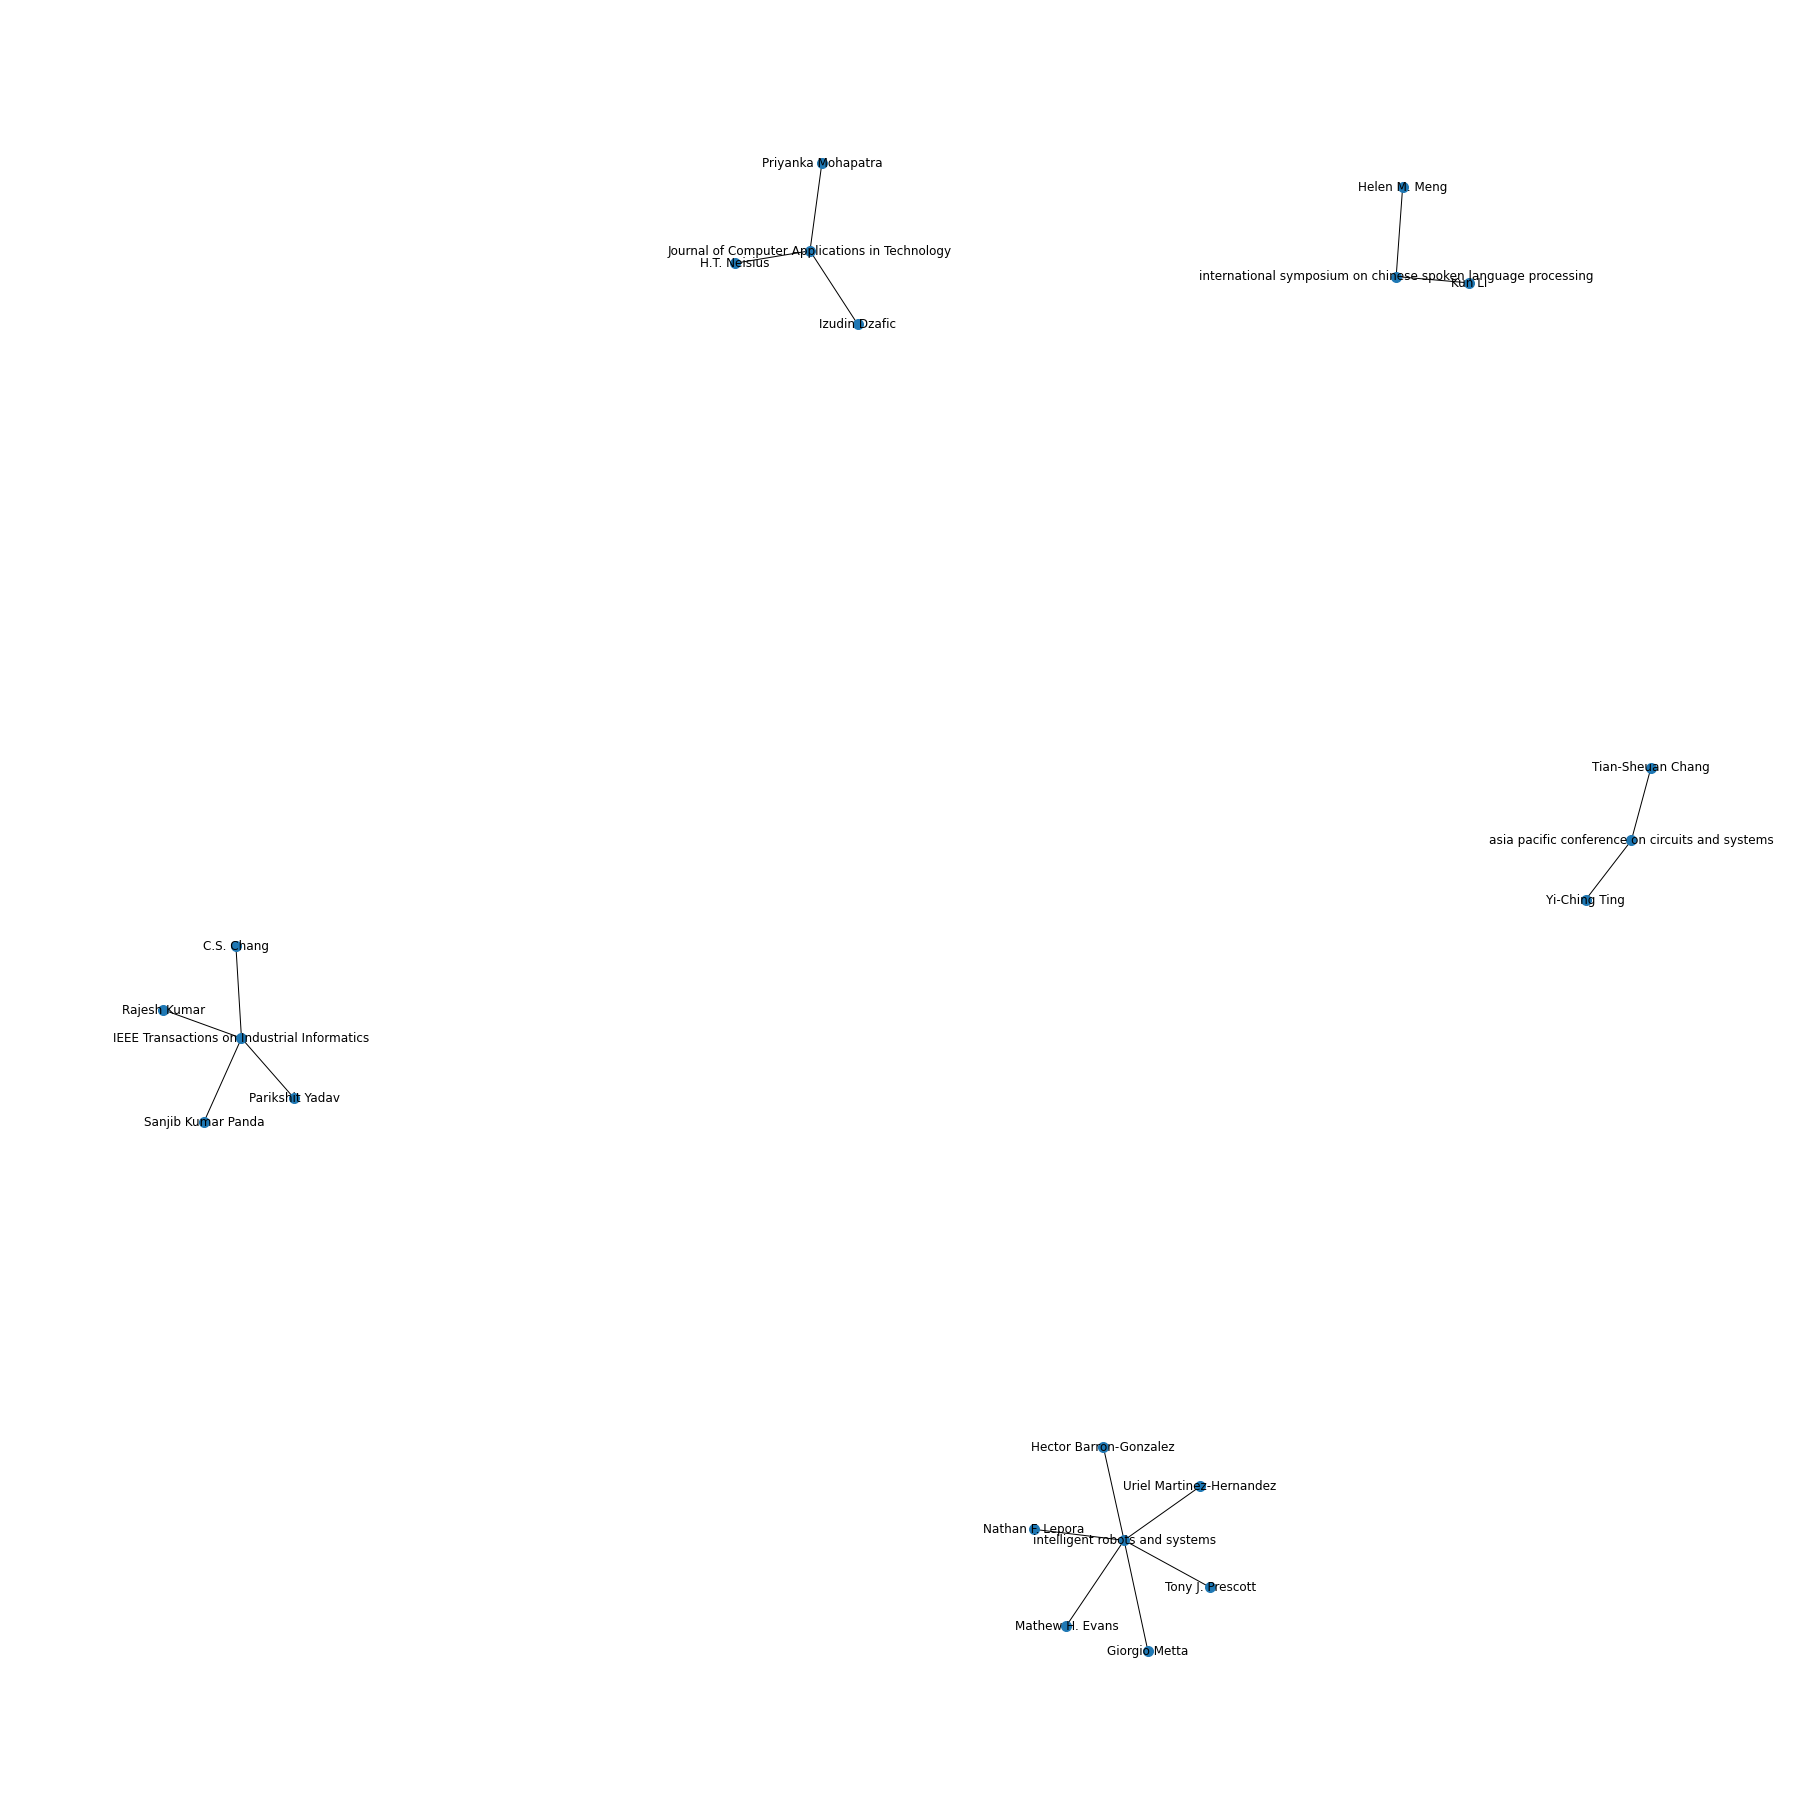

In [184]:
plt.figure(figsize=(25,25))
nx.draw(av,with_labels=True, font_size=12, node_size = 100)
G.clear()

In [269]:
# Analysis 0 , 1
n = G.number_of_nodes()
m = G.number_of_edges()
density_g1 = nx.density(G)
num_connected_comp = len(list(nx.connected_components(G)))
degree_values = list(dict(G.degree()).values())
min_degree = min(degree_values)
max_degree = max(degree_values)
avg_degree = sum(degree_values)/n
# diameter = infinity 
std_degree = (sum([((x - avg_degree) ** 2) for x in degree_values]) / len(degree_values)) **0.5
print(f'Graph 1 :\n Total number of nodes: {n}\n Total number of edges: {m} \n Density : {density_g1} \n Number of connected components: {num_connected_comp} \n Minimum Degree : {min_degree} \n Maximum Degree : {max_degree} \n Average Degree : {avg_degree} \n Standard Deviation : {std_degree} \n Diameter : Infinity')

n = paper_citation.number_of_nodes()
m = paper_citation.number_of_edges()
density_g1 = nx.density(paper_citation)
# num_connected_comp = len(list(nx.connected_components(paper_citation)))
degree_values = list(dict(paper_citation.degree()).values())
min_degree = min(degree_values)
max_degree = max(degree_values)
avg_degree = sum(degree_values)/n
# diameter = infinity 
std_degree = (sum([((x - avg_degree) ** 2) for x in degree_values]) / len(degree_values)) **0.5
print(f'\n\nGraph 2 :\n Total number of nodes: {n}\n Total number of edges: {m} \n Density : {density_g1} \n Number of connected components: Cant be done \n Minimum Degree : {min_degree} \n Maximum Degree : {max_degree} \n Average Degree : {avg_degree} \n Standard Deviation : {std_degree} \n Diameter : Infinity')

n = av.number_of_nodes()
m = av.number_of_edges()
density_g1 = nx.density(av)
num_connected_comp = len(list(nx.connected_components(av)))
degree_values = list(dict(av.degree()).values())
min_degree = min(degree_values)
max_degree = max(degree_values)
avg_degree = sum(degree_values)/n
# diameter = infinity 
std_degree = (sum([((x - avg_degree) ** 2) for x in degree_values]) / len(degree_values)) **0.5
print(f'\n\nGraph 3 :\n Total number of nodes: {n}\n Total number of edges: {m} \n Density : {density_g1} \n Number of connected components: {num_connected_comp} \n Minimum Degree : {min_degree} \n Maximum Degree : {max_degree} \n Average Degree : {avg_degree} \n Standard Deviation : {std_degree} \n Diameter : Infinity')

Graph 1 :
 Total number of nodes: 17
 Total number of edges: 26 
 Density : 0.19117647058823528 
 Number of connected components: 5 
 Minimum Degree : 1 
 Maximum Degree : 5 
 Average Degree : 3.0588235294117645 
 Standard Deviation : 1.5893242454242698 
 Diameter : Infinity


Graph 2 :
 Total number of nodes: 41
 Total number of edges: 36 
 Density : 0.02195121951219512 
 Number of connected components: Cant be done 
 Minimum Degree : 1 
 Maximum Degree : 14 
 Average Degree : 1.7560975609756098 
 Standard Deviation : 2.666691453384706 
 Diameter : Infinity


Graph 3 :
 Total number of nodes: 22
 Total number of edges: 17 
 Density : 0.0735930735930736 
 Number of connected components: 5 
 Minimum Degree : 1 
 Maximum Degree : 6 
 Average Degree : 1.5454545454545454 
 Standard Deviation : 1.233150906022776 
 Diameter : Infinity


In [270]:
# Analysis 2:
Maximal_groups = list(nx.find_cliques(G))
Maximal_groups

[['Uriel Martinez-Hernandez',
  'Hector Barron-Gonzalez',
  'Mathew H. Evans',
  'Giorgio Metta',
  'Nathan F. Lepora',
  'Tony J. Prescott'],
 ['Parikshit Yadav', 'Rajesh Kumar', 'Sanjib Kumar Panda', 'C.S. Chang'],
 ['Yi-Ching Ting', 'Tian-Sheuan Chang'],
 ['Kun Li', 'Helen M. Meng'],
 ['H.T. Neisius', 'Priyanka Mohapatra', 'Izudin Dzafic']]

In [289]:
# Analysis 3a:
x = nx.degree_centrality(paper_citation)
x = dict(sorted(x.items(), key=lambda item: item[1], reverse= True))
print('\n Paper')
c=0
for i,j in x.items():
  if c>4:
    print(f'{i}')
  if c == 14:
    break
  c+=1


# Analysis 3b:
x = nx.degree_centrality(av)
x = dict(sorted(x.items(), key=lambda item: item[1], reverse= True))
print('\n Author')
c=0
for i,j in x.items():
  if c>4:
    print(f'{i}')
  c+=1


 Paper
f07b9c56-f13f-4e5f-a31e-b3b7c7a44509
735d071e-4dba-413b-9604-1e948e54772e
a5b89add-eda2-4a97-aa73-47a739c24f37
ce765697-3426-4c23-8806-4b246f204695
fdcd0f7d-0f21-43cf-aa93-073319144e2d
fdf8f78d-3a8f-4e3c-95c6-9b04a1e77f10
2e904d90-00e9-410d-9021-7549ade79991
3925ee21-0475-41ee-8ce2-b638da2e9b19
7750219a-459e-447e-86b2-6a66f2e412e3
7fa2dcc1-6510-4216-b45d-531407d3ac4b

 Author
Yi-Ching Ting
Tian-Sheuan Chang
Izudin Dzafic
H.T. Neisius
Priyanka Mohapatra
Nathan F. Lepora
Uriel Martinez-Hernandez
Hector Barron-Gonzalez
Mathew H. Evans
Giorgio Metta
Tony J. Prescott
Parikshit Yadav
Rajesh Kumar
Sanjib Kumar Panda
C.S. Chang
Kun Li
Helen M. Meng
